# 👶🏻🩺 Fetal Health Classification


*Author: Marcos Jiménez Juliana*


*Completion date: Feb, 2025*

## Context

Reducing child mortality is a crucial goal outlined in several of the United Nations' Sustainable Development Goals (SDGs) and serves as a vital indicator of human development.

The UN aims to eliminate preventable deaths of newborns and children under 5 years of age by 2030, with a target to reduce under-5 mortality to no more than 25 per 1,000 live births. In parallel to the issue of child mortality, maternal mortality also remains a pressing concern, accounting for 295,000 deaths during and after pregnancy and childbirth (as of 2017). A staggering 94% of these maternal deaths occur in low-resource settings, and most of them are preventable.

In this context, Cardiotocograms (CTGs) offer a simple and cost-effective way to assess fetal health, providing healthcare professionals with vital data to help prevent both maternal and child mortality. The equipment works by emitting ultrasound pulses and analyzing the returned signals, providing insights into fetal heart rate (FHR), fetal movements, uterine contractions, and more.

A dataset of 2,126 fetal cardiotocograms (CTGs) has been collected, along with their respective diagnostic features. These CTGs were classified by three expert obstetricians, and a consensus classification label was assigned to each. The diagnostic features represent the set of variables that will be used to estimate the fetal condition (target) as either normal or abnormal.

## 🎯 Objective

To predict the fetal health status during childbirth using Supervised Classification Algorithms.

## Dataset Used

This project uses data publicly available at: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

## Machine Learning Algorithms
- Naive Bayes
- Support Vector Machine (SVM)
- K-nearest neighbor (KNN)

## Key Steps 

1. Statistical and Visual Analysis: univariant, bivariant and multivariant.
2. Outliers detection (IQR, Z-score) & Feature Scaling.
3. Stratified Data Split.
4. Coarse-to-Fine Hyperparameter Tuning Search.
5. Models Training. 
6. Validation Report: ROC-AUC, Accuracy, F1-score, PR-AUC, etc.


<a id = id_0><a/>
## Table of contents

1. [Loading data](#id_1)

2. [Naive Bayes](#id_5)

<a id = id_1><a/>
# **1. Carga de datos e importación de librerías**

Se importan las librerías a utilizar

In [74]:
# Se importan las libreías a utilizar
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
from sklearn.metrics import confusion_matrix

import time

import warnings
warnings.filterwarnings('ignore')

In [77]:
# Se crea una variable que importa el csv a pandas DataFrame
data = pd.read_csv('fetal_health.csv', sep = ';')
# Se checkean las primeras filas del DataFrame
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Fetal_state
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


Se eliminan las columnas que no aportan valor al modelo:

In [6]:
# Se eliminan columna innecesarias
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [8]:
# Se cuantifica el número de valores nulos del dataset
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

Es buena práctica buscar si hay entradas duplicadas en el dataset. Según la documentación oficial de la función `df.duplicated()` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html), si no se especifica un subset de columnas, la función busca filas que tengan valores duplicados en todas y cada una de las columnas:

In [11]:
# Se detecta la presencia de filas duplicadas
data.duplicated().sum()

14

In [13]:
# Se eliminan dichas filas duplicadas y se checkea que efectivamente se han borrado
print(f'Filas iniciales: {data.shape[0]}')
data = data.drop_duplicates()
print(f'Filas finales: {data.shape[0]}')

Filas iniciales: 2126
Filas finales: 2112


# 2. Análisis Exploratorio de Datos

## 2.1. Análisis general

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2112 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2112 non-null   int64  
 1   AC        2112 non-null   int64  
 2   FM        2112 non-null   int64  
 3   UC        2112 non-null   int64  
 4   ASTV      2112 non-null   int64  
 5   MSTV      2112 non-null   float64
 6   ALTV      2112 non-null   int64  
 7   MLTV      2112 non-null   float64
 8   DL        2112 non-null   int64  
 9   DS        2112 non-null   int64  
 10  DP        2112 non-null   int64  
 11  Width     2112 non-null   int64  
 12  Min       2112 non-null   int64  
 13  Max       2112 non-null   int64  
 14  Nmax      2112 non-null   int64  
 15  Nzeros    2112 non-null   int64  
 16  Mode      2112 non-null   int64  
 17  Mean      2112 non-null   int64  
 18  Median    2112 non-null   int64  
 19  Variance  2112 non-null   int64  
 20  Tendency  2112 non-null   int64  
 

> **Comentario**: la primera observación relevante es que todas las variables son de tipo numérico, ya sea entero (int64) o decimal (float64).

In [20]:
# Se observan las medidas de centralizacion, localizacion y dispersion
# Además, se ha añadido a la tabla el número de valores únicos de cada variable
medidas = data.describe().transpose()
medidas['unique'] = data.agg(['nunique']).transpose()
medidas

,count,mean,std,min,25%,50%,75%,max,unique
LBE,2112.0,133.296875,9.833066,106.0,126.0,133.0,140.0,160.0,48
AC,2112.0,2.733902,3.567741,0.0,0.0,1.0,4.0,26.0,22
FM,2112.0,7.267992,37.244378,0.0,0.0,0.0,2.0,564.0,96
UC,2112.0,3.678504,2.844685,0.0,1.0,3.0,5.0,23.0,19
ASTV,2112.0,46.978693,17.167716,12.0,32.0,49.0,61.0,87.0,75
MSTV,2112.0,1.335559,0.884232,0.2,0.7,1.2,1.7,7.0,57
ALTV,2112.0,9.759943,18.270136,0.0,0.0,0.0,11.0,91.0,87
MLTV,2112.0,8.169176,5.633034,0.0,4.6,7.4,10.8,50.7,249
DL,2112.0,1.580492,2.504219,0.0,0.0,0.0,3.0,16.0,15
DS,2112.0,0.003314,0.057489,0.0,0.0,0.0,0.0,1.0,2


A continuación, se observa la distribución de los datos de forma visual para cada variable, en un **histograma** y en un **box-plot** (en verde la mediana o Q2 y en rojo la media):

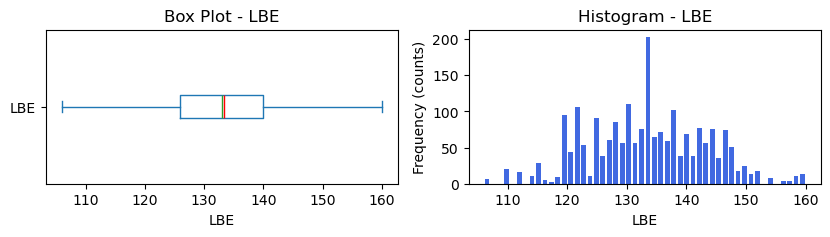

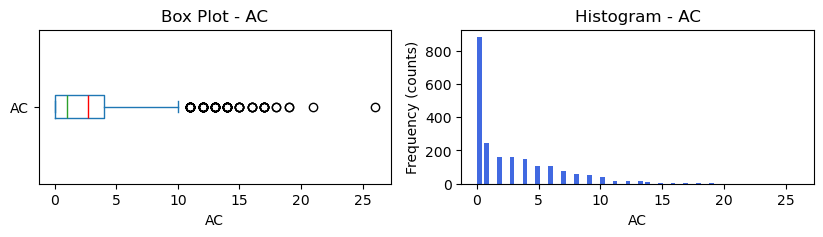

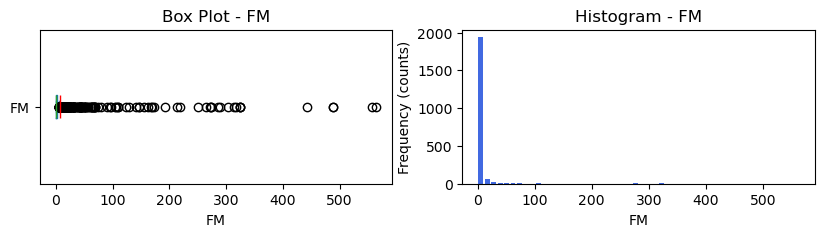

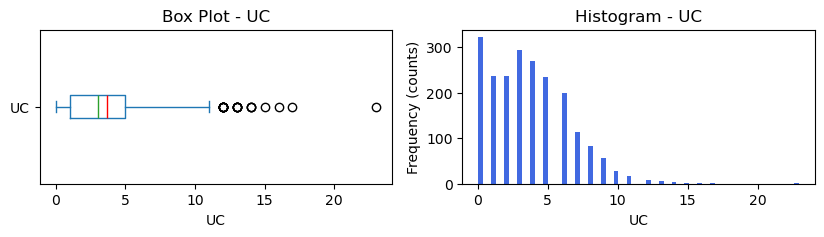

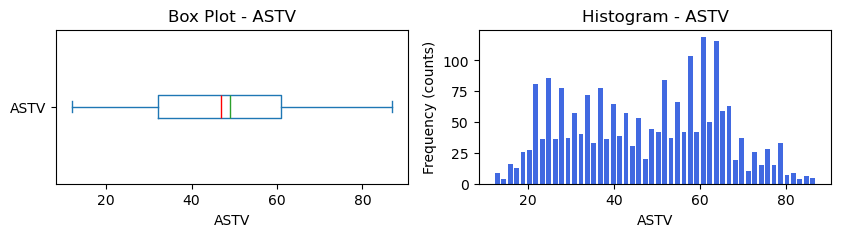

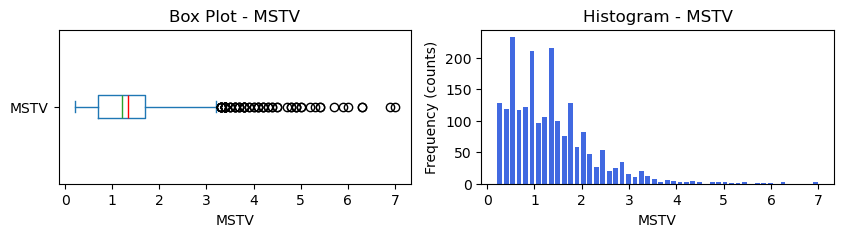

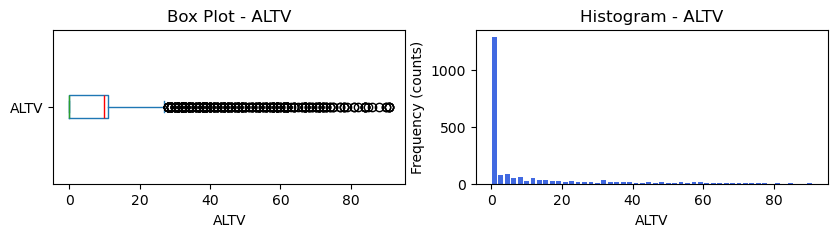

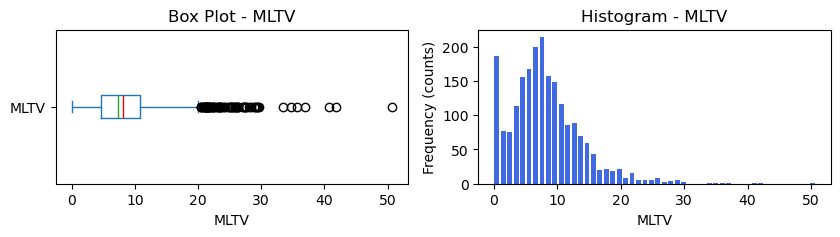

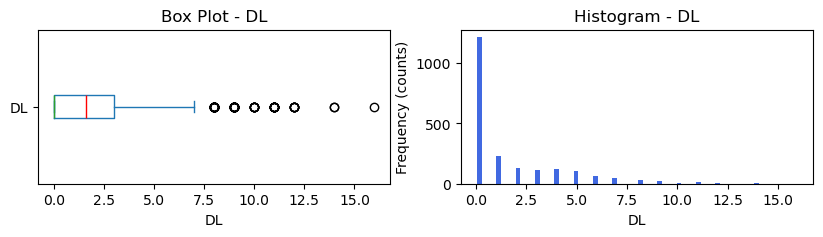

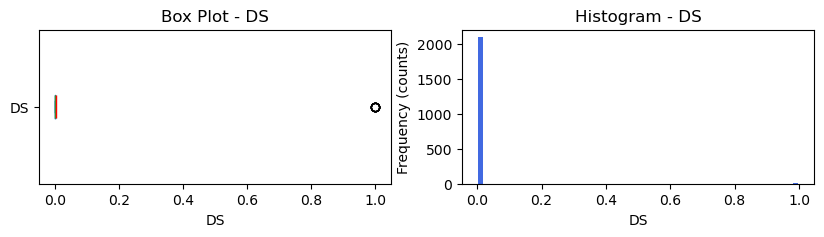

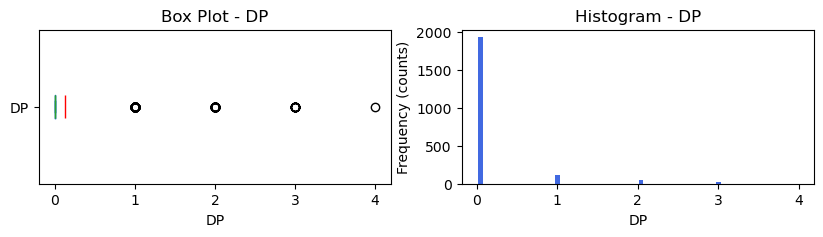

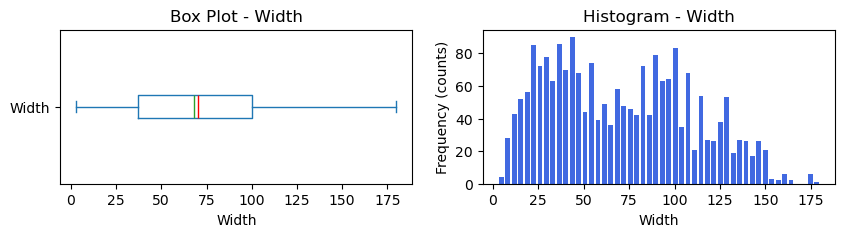

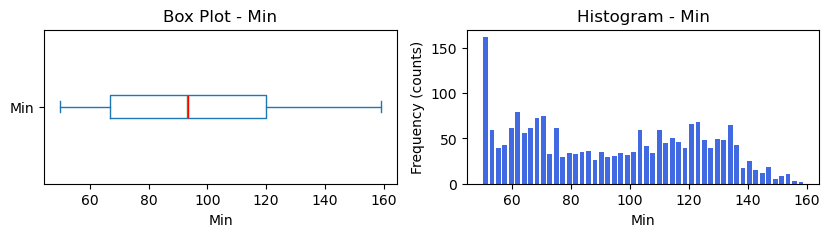

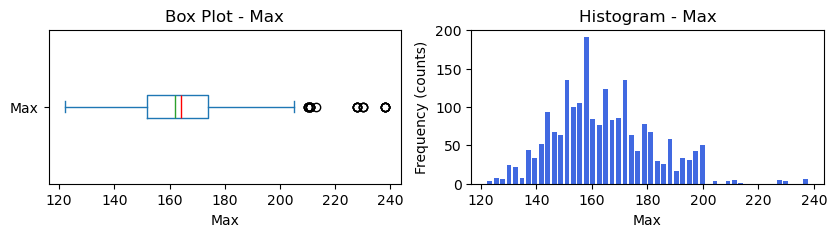

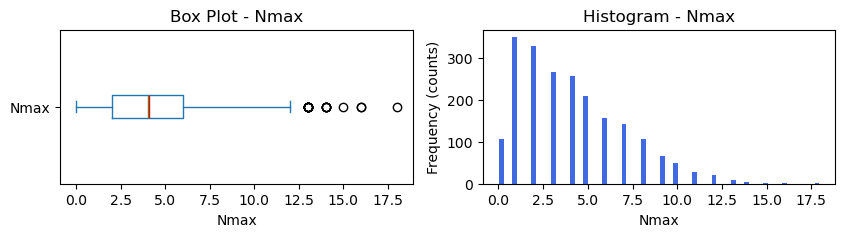

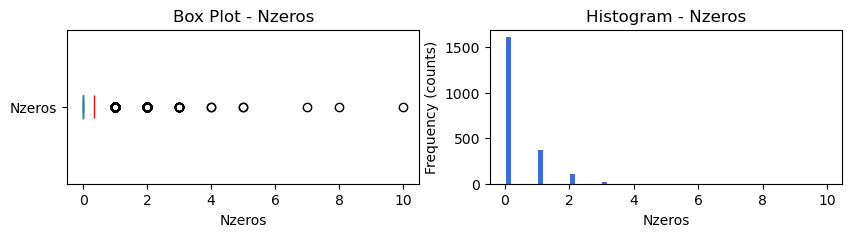

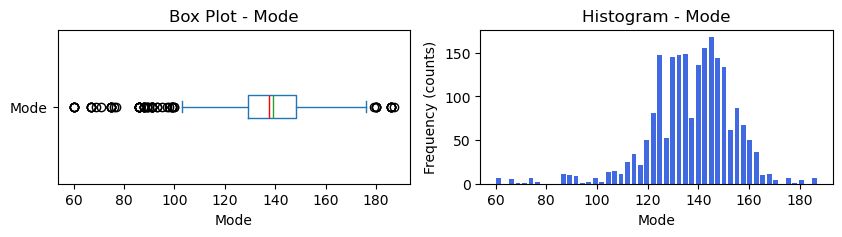

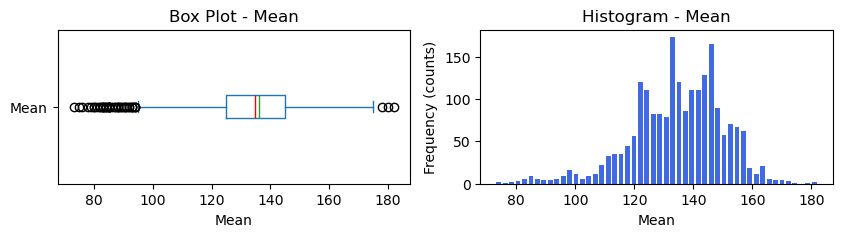

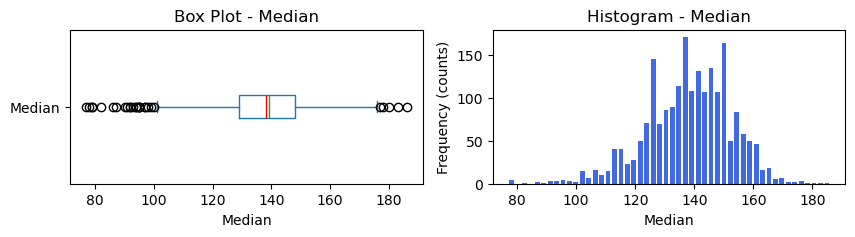

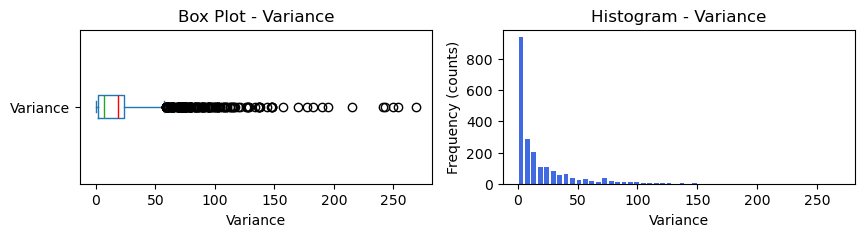

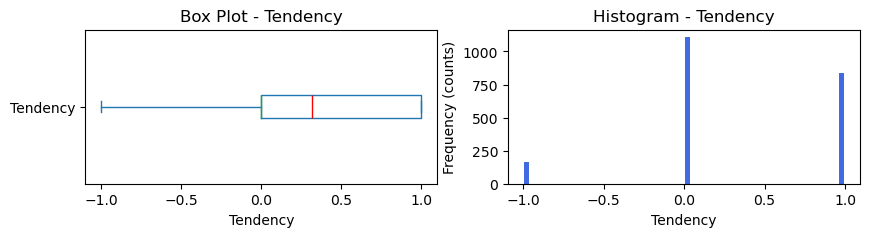

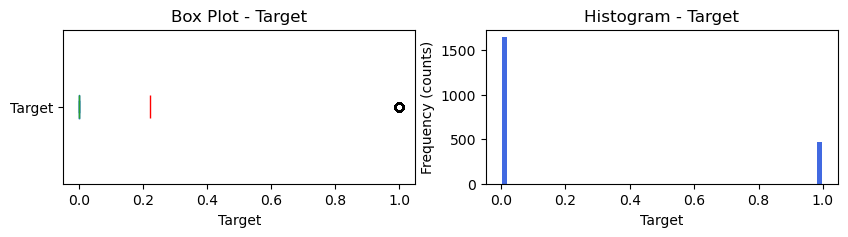

In [23]:
# Se itera sobre todas las variables
for variable in data.columns:
  # Se crea la figura
  fig, axes = plt.subplots(1, 2, figsize=(10, 2))

# Plot 1 - BoxPlot
  data[variable].plot(kind = 'box', 
                      vert = False, 
                      showmeans = True, # Para que se muestre la media
                      meanline=True,    # Para que se muestre la media
                      meanprops={'color': 'red', 'linestyle': '-'}, # media en rojo
                      ax = axes[0]
                     )
  axes[0].set_title(f'Box Plot - {variable}')
  axes[0].set_xlabel(variable)

 # Plot 2 - Histograma
  data[variable].plot(kind = 'hist',
                      bins = 50, # Para ajustar el numero de bins al numero de valores únicos: bins = len(data[variable].value_counts())
                      rwidth=0.75,
                      color = 'royalblue',
                      ax = axes[1]
                     )
  axes[1].set_title(f'Histogram - {variable}')
  axes[1].set_xlabel(variable)
  axes[1].set_ylabel('Frequency (counts)')

  plt.show()

Distribución de la variable **'Target'**:

Target
0    1646
1     466
Name: count, dtype: int64

Text(0.5, 1.0, 'Estado Fetal')

<Figure size 300x300 with 0 Axes>

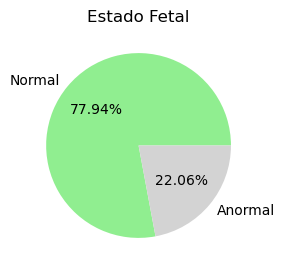

In [25]:
# Se representan en un Pie chart la variable Fetal_state
plt.figure(figsize=(3, 3))
a, b = data['Fetal_state'].value_counts()
plt.figure(figsize = (3,3))
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.2f%%", colors = ['lightgreen','lightgray'])
display(data["Fetal_state"].value_counts())
plt.title('Estado Fetal')
#plt.savefig("Fetal_state.png", dpi=600)

## 2.2. Clasificación de variables por tipo

En base al análisis general previo, es posible clasificar las variables según el tipo de datos que contienen:

| Variable  | Descripción                                              | Tipo de Variable                           |
|-----------|----------------------------------------------------------|--------------------------------------------|
| **LBE**   | Fetal heart rate baseline (beats per minute)             | Cuantitativa - Continua                   |
| **AC**    | Number of accelerations per second                       | Cuantitativa - Discreta                   |
| **FM**    | Number of fetal movements per second                     | Cuantitativa - Discreta                   |
| **UC**    | Number of uterine contractions per second                | Cuantitativa - Discreta                   |
| **ASTV**  | Percentage of time with abnormal short-term variability  | Cuantitativa - Continua                   |
| **MSTV**  | Mean value of short-term variability                     | Cuantitativa - Continua                   |
| **ALTV**  | Percentage of time with abnormal long-term variability   | Cuantitativa - Continua                   |
| **MLTV**  | Mean value of long-term variability                      | Cuantitativa - Continua                   |
| **DL**    | Number of light decelerations per second                 | Cuantitativa - Discreta                   |
| **DS**    | Number of severe decelerations per second                | Cuantitativa - Discreta                   |
| **DP**    | Number of prolonged decelerations per second             | Cuantitativa - Discreta                   |
| **Width** | Width of FHR histogram                                   | Cuantitativa - Continua                   |
| **Min**   | Minimum (low frequency) of FHR histogram                 | Cuantitativa - Continua                   |
| **Max**   | Maximum (high frequency) of FHR histogram                | Cuantitativa - Continua                   |
| **Nmax**  | Number of histogram peaks                                | Cuantitativa - Discreta                   |
| **Nzeros**| Number of histogram zeros                                | Cuantitativa - Discreta                   |
| **Mode**  | Histogram mode                                           | Cuantitativa - Continua                   |
| **Mean**  | Histogram mean                                           | Cuantitativa - Continua                   |
| **Median**| Histogram median                                         | Cuantitativa - Continua                   |
| **Variance** | Histogram variance                                   | Cuantitativa - Continua                   |
| **Tendency** | Histogram tendency                                   | Cualitativa - Politómica ordenada         |
| **Fetal_state**   | Fetal state class code                               | Cualitativa - Dicotómica                  |




**Nota**: hay algunas variables que se han clasificado como variables cuantitativas discretas que podrían ser consideradas de tipo continuo según donde se ponga el umbral. Por ejemplo, las variables AC y UC, tienen 19 y 22 valores únicos y han sido consideradas de tipo discreto.

## 2.3. Análisis Multivariante

### 2.3.1 Matriz de Correlaciones

Se ha calculado el **coeficiente de correlación de Pearson** para las variables numéricas del dataset. El coeficiente de correlación de Pearson mide la fuerza y la dirección de la relación lineal entre dos variables numéricas. Va de -1 a 1. 0 indica que no hay relación lineal entre las variables, 1 indica relación perfecta positiva y -1 relación perfecta negativa. Es decir, valores distintos de cero indican que una variable aumenta (si signo positivo) o disminuye (si signo negativo) en función de la otra. Recordar que correlación no implica causalidad.

In [27]:
# Se calcula el coeficiente de correlación de Pearson para cada par de variables numéricas
corr = data.corr()

> **Nota**: el método pd.corr() ofrece también los métodos de correlación de Kendall y de Spearman. Link a la documentación oficial: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

<Axes: >

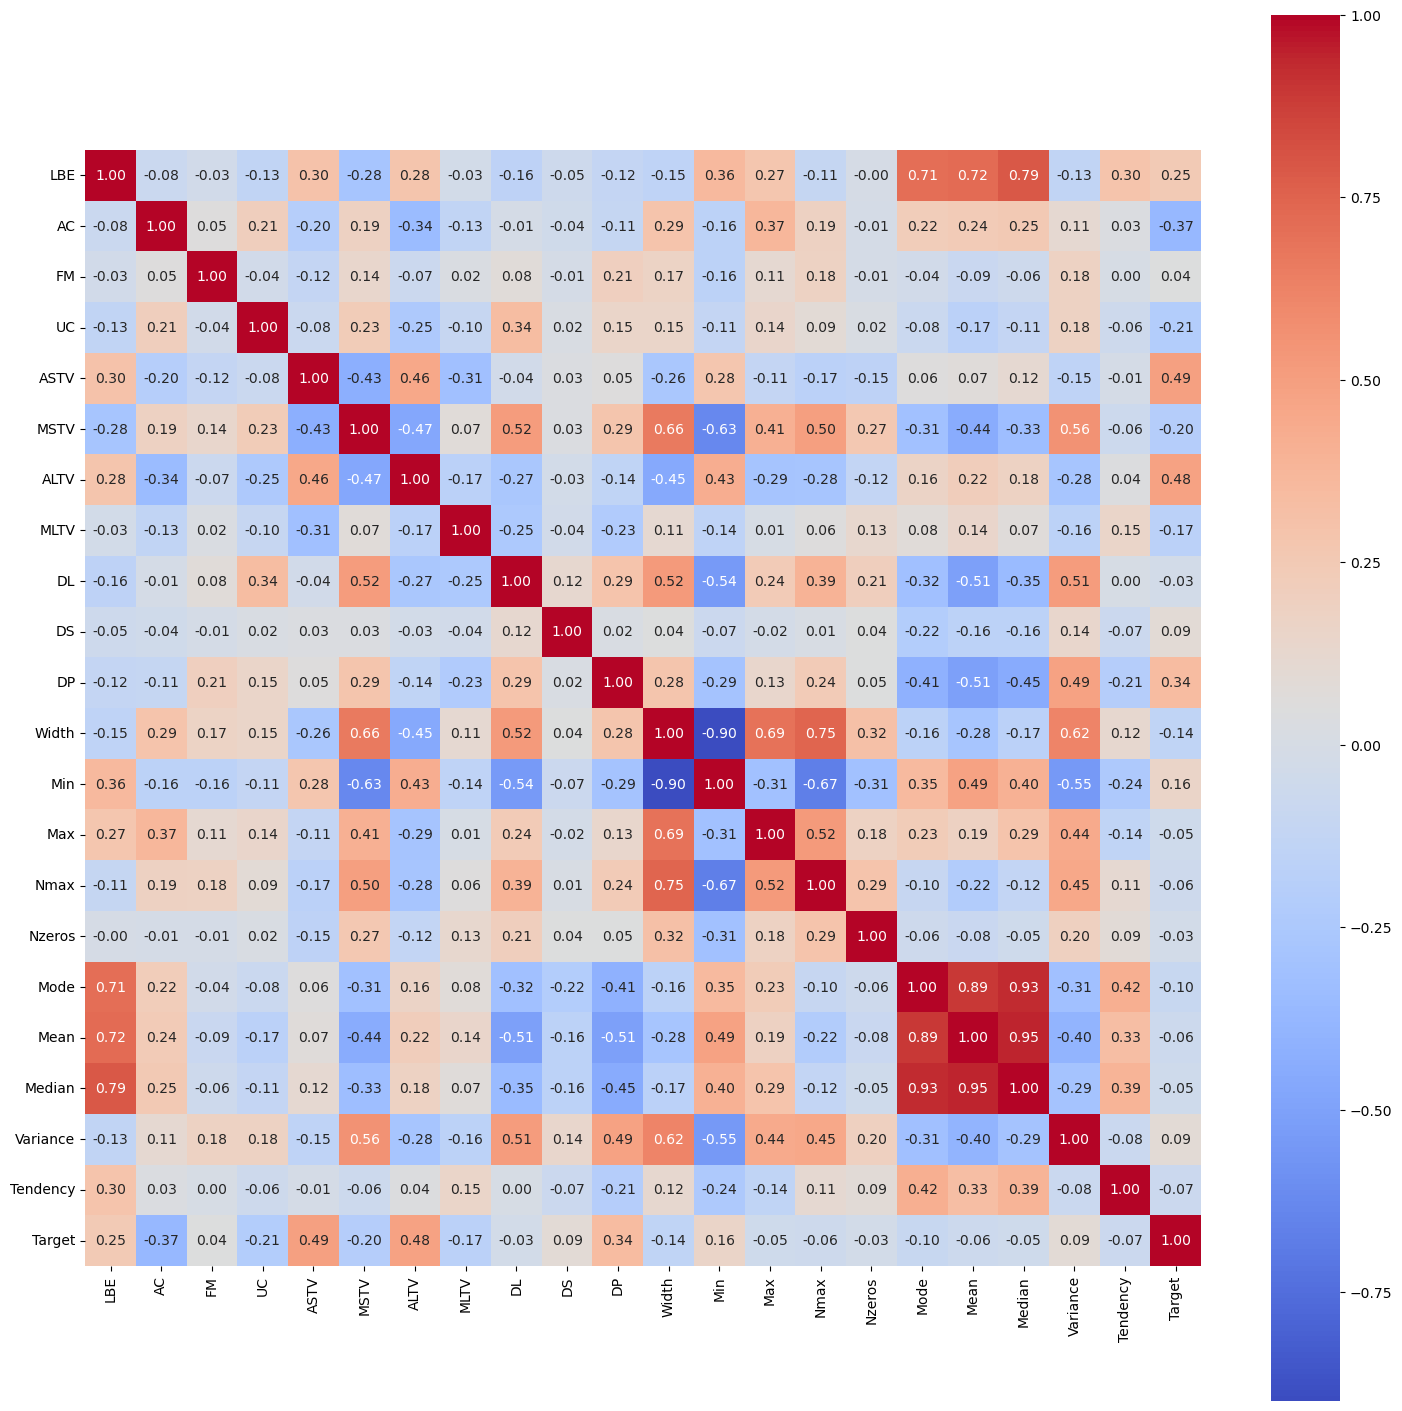

In [29]:
# Se representan dichos coeficientes con un mapa de calor
plt.figure(figsize = (18,18))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
#plt.savefig("Corr.png", dpi=600)

> A continuación se enumeran las 3 variables explicativas que presentan mayor correlación con el Fetal_state**:
> - **ASTV** (Coef. Pearson = 0.49): porcentaje de tiempo con variabilidad anormal a corto plazo. El coeficiente indica una correlación lineal positiva moderada entre esta variable y la variable Fetal_state. 
> - **ALTV** (Coef. Pearson = 0.48): porcentaje de tiempo con variabilidad anormal a largo plazo. El coeficiente indica una correlación lineal positiva moderada entre esta variable y la variable Fetal_state. 
> - **AC** (Coef. Pearson = -0.37): número de aceleraciones por segundo, que se cuenta en unidades discretas. El coeficiente indica una correlación lineal negativa moderada entre esta variable y la variable Fetal_state (al incrementar una, disminuye la otra).


Por otro lado, cabe comentar que **se observan varias correlaciones fuertes entre variables independientes**. Un ejemplo evidente es el observado entre las variables moda, mediana y media, que están fuertemente correlacionadas de forma positiva. También se observa una correlación negativa fuerte (Coef. Pearson = -0.9) entre la variable 'Min' y 'Width'. Debido a la presunción del algoritmo Naive Bayes de que se asume que las variables explicativas son idependientes entre sí, es conveniente tener presentes los datos de la matriz de correlación para tratar de mejorar el modelo sifuera necesario.

### 3.2. Análisis visual de variables cuantitativas vs cuantitativas

Con el fin de visualizar gráficamente algunas de las las correlaciones mencionadas entre las variables explicativas del dataset, se ha realizado una visualización de tipo **scatter plot** entre algunas de las variables previamente mencionadas. Nota: si se quiere, sería posible realizar una tabla masiva de scatter plots relacionando todas las variables con `sns.pairplot()`.

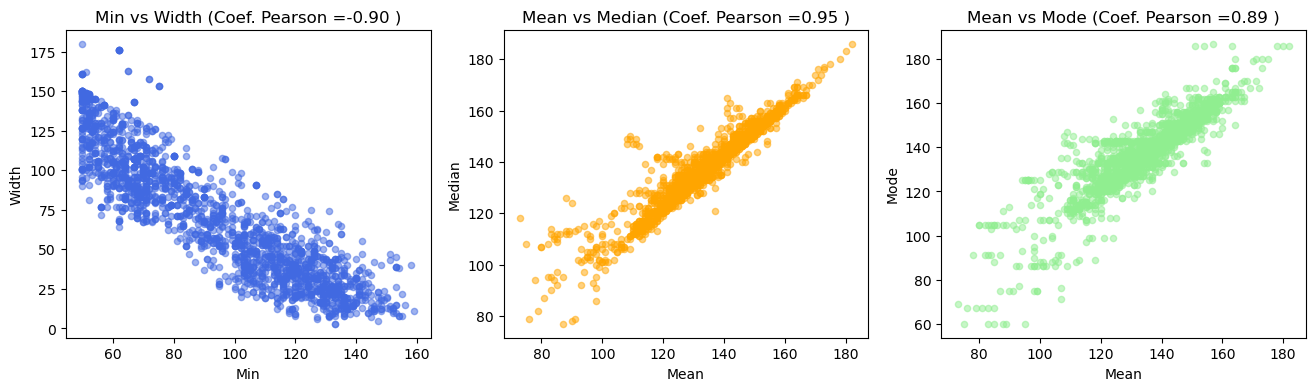

In [31]:
# Hago scatter plots para cada variable no categórica 1 vs 1

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot 1 - Min vs Width
data.plot(kind = 'scatter', x = 'Min', y = 'Width', color = 'royalblue', alpha = 0.5, ax = axes[0])
axes[0].set_title(f'Min vs Width (Coef. Pearson ={corr['Min']['Width']:.2f} )') # El .2f sirve para redondear el coeficiente a 2 decimales. 

# Plot 2 - Media vs Mediana
data.plot(kind = 'scatter', x = 'Mean', y = 'Median', color = 'orange', alpha = 0.5, ax = axes[1])
axes[1].set_title(f'Mean vs Median (Coef. Pearson ={corr['Mean']['Median']:.2f} )')

# Plot 3 - Meida vs Moda
data.plot(kind = 'scatter', x = 'Mean', y = 'Mode', color = 'lightgreen', alpha = 0.5, ax = axes[2])
axes[2].set_title(f'Mean vs Mode (Coef. Pearson ={corr['Mean']['Mode']:.2f} )')


plt.show()

### 3.3. Análisis visual de la variable Fetal_state vs cuantitativas

A continuación se ha realizado un análisis visual de la variable categóricas la variable **'Fetal_state'** con respecto al resto de variables no categóricas del dataset:


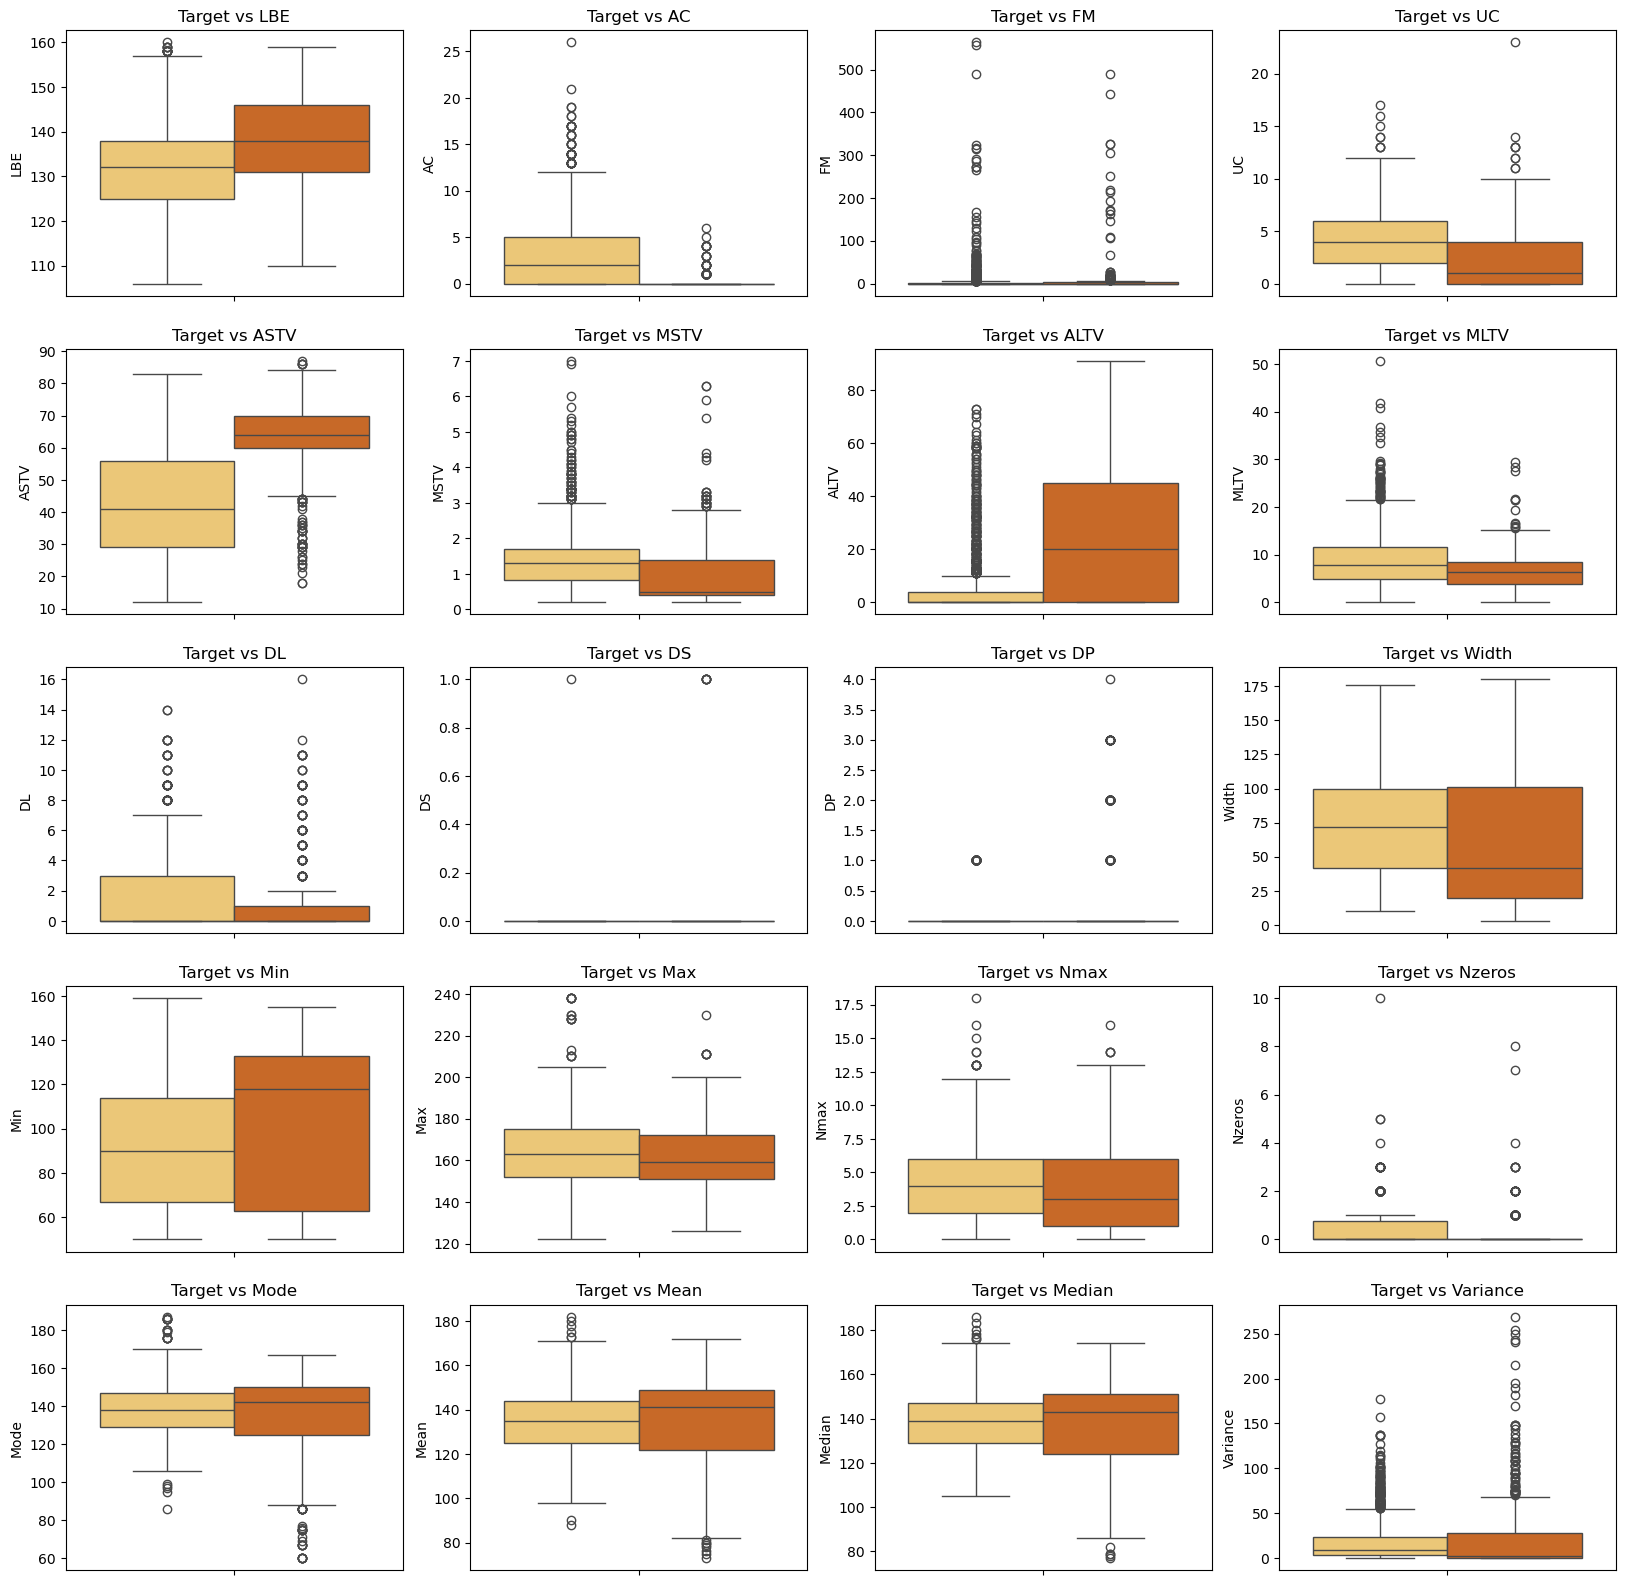

In [33]:
# Selecciono las variables no categóricas
non_categorical_variables = ["LBE", "AC", "FM", "UC", "ASTV", "MSTV", "ALTV", "MLTV", "DL", "DS","DP", "Width", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean","Median", "Variance"]

fig, axes = plt.subplots(5, 4 , figsize=(20, 20))
fila = 0
col = 0
for no_categorica in non_categorical_variables:
    sns.boxplot(hue = 'Fetal_state' , y= no_categorica, data = data, palette="YlOrBr", legend = False, ax = axes[fila][col])
    axes[fila][col].set_title(f'Fetal_state vs {no_categorica}')
    col += 1
    if col > 3:
        col = 0
        fila +=1  
plt.show()   

> En la matriz de correlación se observó que las 3 variables explicativas que presentaron mayor correlación con el Fetal_state fueron **ASTV**(Coef. Pearson = 0.49) , **ALTV** (Coef. Pearson = 0.48) y **AC** (Coef. Pearson = -0.37). Esto se confirma visualmente en este apartado, ya que si se observan los gráficos correspondientes a estas 3 variables respecto a la variable Fetal_state, se observa claramente cómo son las 3 variables que presentan mayor diferencia en el boxplot entre Fetal_state = 0 y Fetal_state = 1. 

# 3. Detección y tratamiento de outliers

## 3.1 Detección de outliers (IQR y Z-score)

Es importante identificar la presencia de posibles datos anómalos que se alejen de la media de la distribución del resto de registros. Estos datos anómalos son conocidos como *outliers*. Se han utilizado dos métodos de detección de outliers:

- **IQR**: o rango intercuartílico. El rango intercuartílico es el 50 % central de los datos. Si se dividen los datos en 4 porciones iguales o cuartiles (Q1-Q4), los dos cuartiles centrales  representan el IQR, es decir: IQR = Q3−Q1. Este método considera como outliers todos los datos que estén fuera de 1.5 veces el IQR desde el Q1 o el Q3, es decir $[Q1−1.5×IQR,Q3+1.5×IQR]$.

- **Z-score**: lo que se calcula es a cuantas desviaciones estándar está cada valor de la media. Es decir, la media quedará situada en 0, la desv. estándar en +-1 y los valores se distribuirán en un rango +infinito/-infinito, siendo positivos si son mayores que la media y negativos si menores. En una distribución normal:
  - **95%** de los valores están entre \( Z = -2 \) y \( Z = 2 \).
  - **99.7%** de los valores están entre \( Z = -3 \) y \( Z = 3 \). Por este motivo es común utilizar un umbral de +-3 para detectar outliers.

Se calcula de la siguiente manera: para una muestra `x`, `z = (x - u) / s` donde `u` es la media y `s` es la desviación estándar. También se podría usar el StandarScaler() de sklearn para calcularlo.

In [35]:
# MÉTODO IQR

# Se crea un nuevo dataframe
n_outliers = pd.DataFrame()

# Se seleccionan las variables no categóricas
non_categorical_variables = ["LBE", "AC", "FM", "UC", "ASTV", "MSTV", "ALTV", "MLTV", "DL","DP", "Width", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean","Median", "Variance"]

# Se itera sobre las variables no categóricas
for variable in non_categorical_variables:
  q1, q3 = data[variable].quantile([0.25, 0.75]) # Almaceno los datos de los cuartiles 1 y 3
  IQR = q3 - q1                 # Calculo el IQR
  lower_bound = q1 - 1.5 * IQR  # Calculo el límite inferior
  upper_bound = q3 + 1.5 * IQR  # Calculo el límite superior
  # Almaceno la suma de los datos que quedan fuera de los límites
  outliers_count = ((data[variable] < lower_bound) | (data[variable] > upper_bound)).sum()
  # Almaceno dicha suma en el dataframe n_outliers
  n_outliers[variable] = [outliers_count]

n_outliers = n_outliers.transpose().reset_index()
n_outliers.columns = ['Variable', "n_outliers_IQR"]
n_outliers

,Variable,n_outliers_IQR
0,LBE,0
1,AC,83
2,FM,307
3,UC,22
4,ASTV,0
5,MSTV,70
6,ALTV,304
7,MLTV,71
8,DL,81
9,DP,178


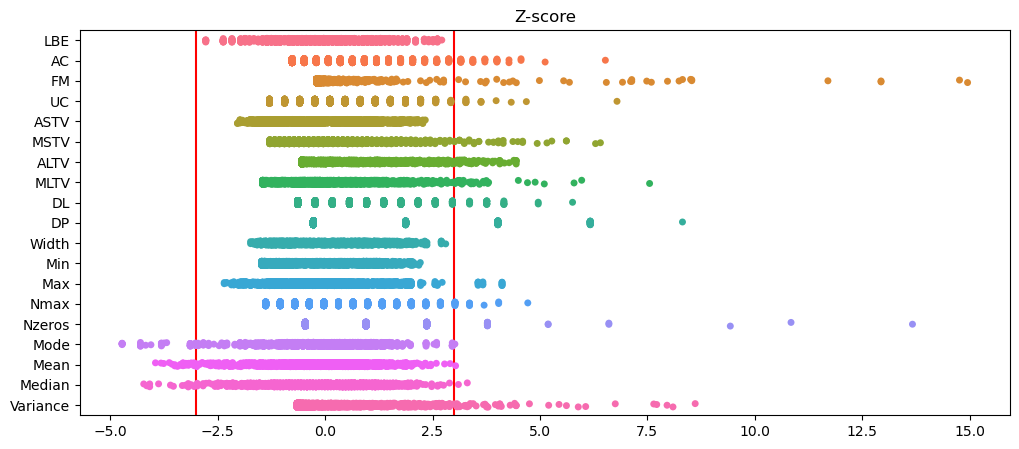

In [37]:
# MÉTODO Z-SCORE

# Creo un nuevo dataframe
Z_scores = pd.DataFrame()

#Creo una lista vacía
n_outliers_Z_score = []

# Itero sobre las variables no categóricas
for variable in non_categorical_variables:  
    
    # Calculo el Z-score para cada variable y almaceno los resultados en el nuevo df 'Z_scores'
    Z_scores[variable] = (data[variable]- data[variable].mean())/ data[variable].std()
    
    # Identifico los indices de las filas que se ha considerado que tienen valores outliers
    indices = Z_scores[variable].loc[(Z_scores[variable] >3) | (Z_scores[variable] <-3)].index.tolist()

    # Almaceno en la lista creada previamente el numero de outliers
    n_outliers_Z_score.append(len(indices))

# Creo una nueva columna en el df  n_outliers con los nuevos datos
n_outliers["n_outliers_Z_score"] = n_outliers_Z_score


# Represento gráficamente los datos transoformados a Z-score
plt.figure(figsize=(12, 5))

sns.stripplot(data=Z_scores, orient = 'h')

plt.title('Z-score')
# Pinto en rojo los umbrales +3 y -3
plt.axvline(-3, color = 'red')
plt.axvline(3, color = 'red')

plt.show()

In [39]:
n_outliers

,Variable,n_outliers_IQR,n_outliers_Z_score
0,LBE,0,0
1,AC,83,35
2,FM,307,31
3,UC,22,13
4,ASTV,0,0
5,MSTV,70,33
6,ALTV,304,58
7,MLTV,71,33
8,DL,81,28
9,DP,178,69


## 3.1 Tratamiento de outliers

Existen algunas variables con un gran número de outliers. Con el fin de minimizar estos efectos, se han tranformado los datos algunas de las variables con mayor número de outliers:

- Variable **`AC`**: **transformación logarítmica**. Se usa log(x+1) para evitar problemas con valores de cero. Suaviza los valores altos.
- Variable **`FM`**: se ha reducido la variabilidad mediante ***binning*** a solamente 3 categorías codificadas como:
    - 0: si la variable toma valor 0
    - 1: si la variable toma valores entre 0 y 10
    - 2: si la variable toma valores mayores que 10
- Variable **`UC`**: **trasnformación logarítmica**. Se usa log(x+1) para evitar problemas con valores de cero. Suaviza los valores altos.
- Variable **`MSTV`**: se ha utilizado el método de **winsorización**. Se sustituyen valores extremos por el **percentil 98**. Esto reduce la influencia de los valores extremos sin distorsionar demasiado la distribución.

- Variable **`ALTV`**: se ha utilizado el método de **winsorización**. Se sustituyen valores extremos por el **percentil 95**. Esto reduce la influencia de los valores extremos sin distorsionar demasiado la distribución.
- Variable **`MLTV`**: se ha utilizado el método de **winsorización**. Se sustituyen valores extremos por el **percentil 98**. Esto reduce la influencia de los valores extremos sin distorsionar demasiado la distribución.
- Variable **`DL`**: **transformación logarítmica**. Se usa log(x+1) para evitar problemas con valores de cero. Suaviza los valores altos.
- Variable **`DP`**: se ha reducido la variabilidad mediante ***binning*** a solamente 3 categorías codificadas como:
    - 0: si la variable toma valor 0
    - 1: si la variable toma valor 1
    - 2: si la variable toma valor 2 o mayores que 2.
- Variable **`Max`**:se ha utilizado el método de **winsorización**. Se sustituyen valores extremos por el **percentil 98**. Esto reduce la influencia de los valores extremos sin distorsionar demasiado la distribución.
- Variable **`Nmax`**:se ha utilizado el método de **winsorización**. Se sustituyen valores extremos por el **percentil 98**. Esto reduce la influencia de los valores extremos sin distorsionar demasiado la distribución.
- Variable **`Nzeros`**: se ha reducido la variabilidad mediante ***binning*** a solamente 3 categorías codificadas como:
    - 0: si la variable toma valor 0
    - 1: si la variable toma valores entre 0 y 3
    - 2: si la variable toma valores mayores que 3
- Variable **`Mode`**: se ha utilizado el método de **winsorización**. Se sustituyen valores extremos por el **percentil 03**. Esto reduce la influencia de los valores extremos sin distorsionar demasiado la distribución.
- Variable **`Mean`**: se ha utilizado el método de **winsorización**. Se sustituyen valores extremos por el **percentil 02**. Esto reduce la influencia de los valores extremos sin distorsionar demasiado la distribución.
- Variable **`Median`**: se ha utilizado el método de **winsorización**. Se sustituyen valores extremos por el **percentil 02**. Esto reduce la influencia de los valores extremos sin distorsionar demasiado la distribución.
    
- Variable **`Varianza`**: se ha transformado la variable Varianza a Desv. Estándar. Puesto que la desv. estándar se definde como la **raiz cuadrada** de la varianza, se ha calculado esta métrica y se ha sustituido. Esto permite minimizar variaciones extremas. Además, la desv. estándar seguía presentando muchos valores atípicos, por lo que se ha **winsorizado al percentil 98**.

In [41]:
# Creo un nuevo DataFrame para los datos transformados
data_transformed = pd.DataFrame()

# Añado las variables que no van a ser transformadas
data_transformed = data[['LBE','ASTV','DS','Width','Min','Tendency', 'Fetal_state']]

data_transformed.head()

,LBE,ASTV,DS,Width,Min,Tendency,Target
0,120,73,0,64,62,1,1
1,132,17,0,130,68,0,0
2,133,16,0,130,68,0,0
3,134,16,0,117,53,1,0
4,132,16,0,117,53,1,0


**Transformación de variables. Nota:** las variables se han ordenado según la transformación elegida. Este código podría ser optimizado agrupando las transformaciones similares, pero he decidio dejarlo así porque permite hacer modificaciones de cada variable por separado, lo cual es una ventaja a la hora de ajustar posibles cambios.

In [44]:
# Raiz cuadrada
data_transformed['STD'] = np.sqrt(data['Variance'])

# Transformaciones logarítmicas
data_transformed['AC_log'] = np.log1p(data['AC'])  # log(AC + 1)
data_transformed['UC_log'] = np.log1p(data['UC'])  # log(AC + 1)
data_transformed['DL_log'] = np.log1p(data['DL'])  # log(AC + 1)

# Winsorización (se hace por separado porque los percentiles cambian)
data_transformed["MSTV_winsorized"] = winsorize(data["MSTV"], limits=[0, 0.02])
data_transformed["ALTV_winsorized"] = winsorize(data["ALTV"], limits=[0, 0.05])
data_transformed["MLTV_winsorized"] = winsorize(data["MLTV"], limits=[0, 0.02])
data_transformed["Max_winsorized"] = winsorize(data["Max"], limits=[0, 0.02])
data_transformed["Nmax_winsorized"] = winsorize(data["Nmax"], limits=[0, 0.02])
data_transformed["Mode_winsorized"] = winsorize(data["Mode"], limits=[0.03, 0])
data_transformed["Mean_winsorized"] = winsorize(data["Mean"], limits=[0.02, 0])
data_transformed["Median_winsorized"] = winsorize(data["Median"], limits=[0.02, 0])
data_transformed['STD_winsorized'] = winsorize(data_transformed["STD"], limits=[0, 0.02])
data_transformed.drop('STD', axis=1, inplace = True) # Se elimina la STD porque la quiero, además, winsorizada

# BINNING
# Variable FM 
bins = [-1, 0, 10, max(data['FM'])]
categorias = [0, 1, 2]
data_transformed['FM_binned'] = pd.cut(data['FM'], bins, labels = categorias, include_lowest = True)
data_transformed['FM_binned'] = data_transformed['FM_binned'].astype(int)

# Variable DP 
bins = [-1, 0, 1, max(data['DP'])]
categorias = [0, 1, 2]
data_transformed['DP_binned'] = pd.cut(data['DP'], bins, labels = categorias, include_lowest = True)
data_transformed['DP_binned'] = data_transformed['DP_binned'].astype(int)

# Variable Nzeros
bins = [-1, 0, 3, max(data['Nzeros'])]
categorias = [0, 1, 2]
data_transformed['Nzeros_binned'] = pd.cut(data['Nzeros'], bins, labels = categorias, include_lowest = True)
data_transformed['Nzeros_binned'] = data_transformed['Nzeros_binned'].astype(int)

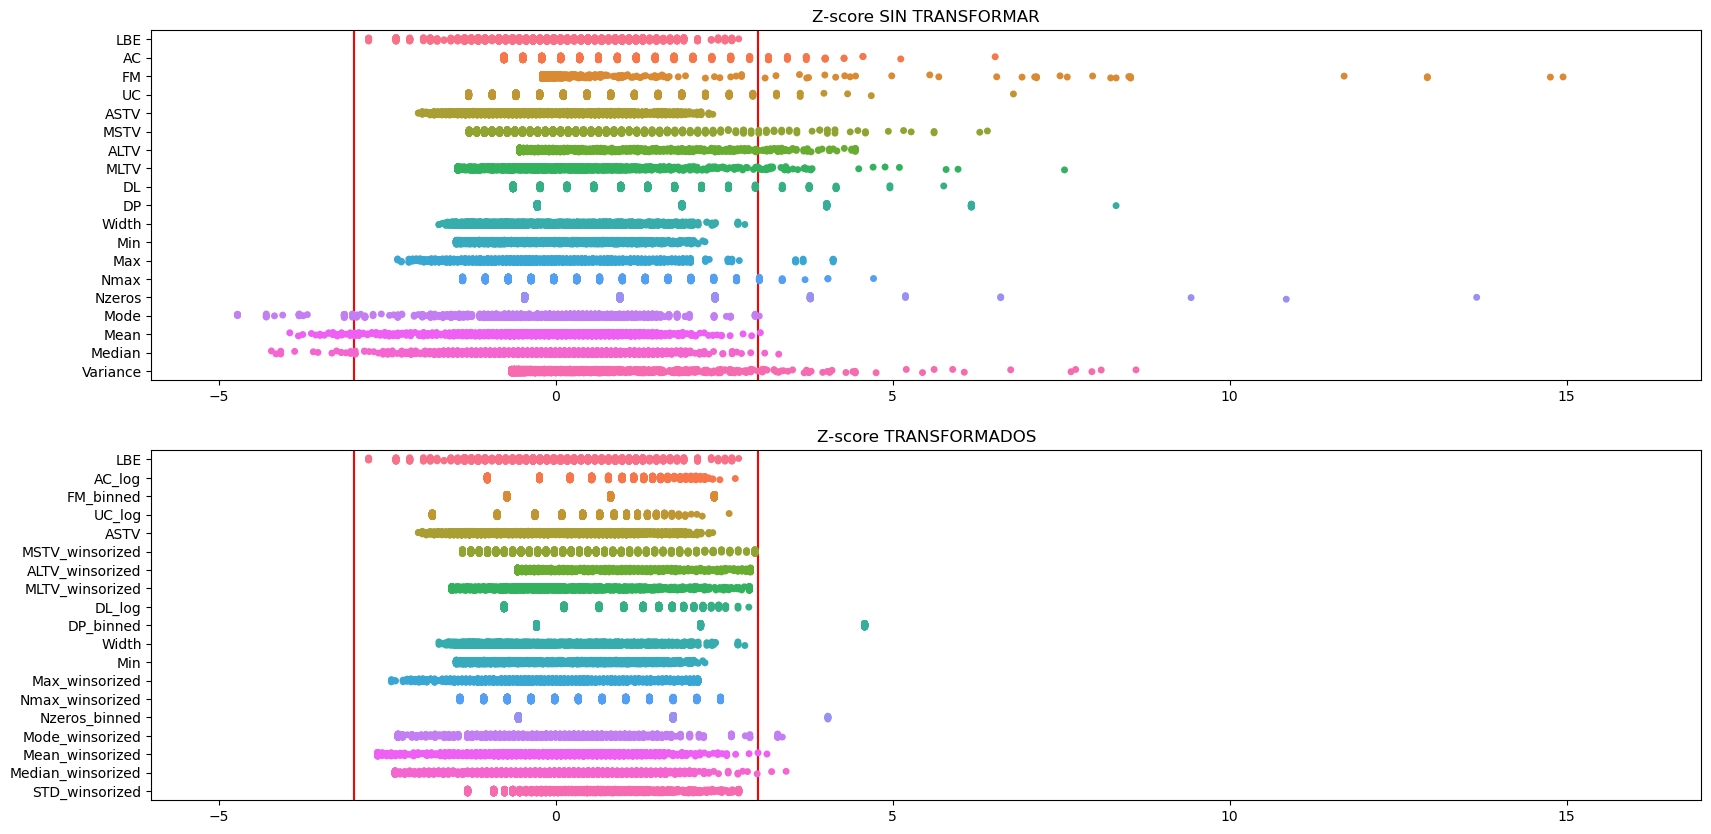

In [46]:
# COMPARACION ANTES VS DESPUÉS

# Creo un nuevo dataframe
Z_scores_new = pd.DataFrame()

n_outliers_Z_score = []

# Se seleccionan las variables no categóricas
new_variables = [
 'LBE',
 'AC_log',
 'FM_binned',
 'UC_log',
 'ASTV',
 'MSTV_winsorized',
 'ALTV_winsorized',
 'MLTV_winsorized',
 'DL_log',
 'DP_binned',
 'Width',
 'Min',
 'Max_winsorized',
 'Nmax_winsorized',
 'Nzeros_binned',
 'Mode_winsorized',
 'Mean_winsorized',
 'Median_winsorized',
 'STD_winsorized'
]

# Itero sobre las variables no categóricas
for variable in new_variables:  
    
    # Calculo el Z-score para cada variable y almaceno los resultados en el nuevo df 'Z_scores'
    Z_scores_new[variable] = (data_transformed[variable]- data_transformed[variable].mean())/ data_transformed[variable].std()
    
    # Identifico los indices de las filas que se ha considerado que tienen valores outliers
    indices = Z_scores_new[variable].loc[(Z_scores_new[variable] >3) | (Z_scores_new[variable] <-3)].index.tolist()

    # Almaceno en la lista creada previamente el numero de outliers
    n_outliers_Z_score.append(len(indices))

# Creo una nueva columna en el df  n_outliers con los nuevos datos
n_outliers["n_outliers_Z_score_TRANSFORMED"] = n_outliers_Z_score

# Represento gráficamente los datos transoformados a Z-score
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

sns.stripplot(data = Z_scores, orient = 'h', ax = axes[0])
axes[0].set_title('Z-score SIN TRANSFORMAR')
axes[0].axvline(-3, color = 'red')
axes[0].axvline(3, color = 'red')
axes[0].set_xlim(-6, 17)

sns.stripplot(data = Z_scores_new, orient = 'h', ax = axes[1])
axes[1].set_title('Z-score TRANSFORMADOS')
axes[1].axvline(-3, color = 'red')
axes[1].axvline(3, color = 'red')
axes[1].set_xlim(-6, 17)

#plt.savefig("Outliers.png", dpi=600)
plt.show()

Los cambios realizados **han reducido drásticamente** el número de outliers presentes en los datos.

In [48]:
n_outliers[['Variable','n_outliers_Z_score', 'n_outliers_Z_score_TRANSFORMED']]

,Variable,n_outliers_Z_score,n_outliers_Z_score_TRANSFORMED
0,LBE,0,0
1,AC,35,0
2,FM,31,0
3,UC,13,0
4,ASTV,0,0
5,MSTV,33,0
6,ALTV,58,0
7,MLTV,33,0
8,DL,28,0
9,DP,69,69


# 4. División del Dataset

Antes de entrenar los algoritmos, es necesario dividir el dataset en los consjuntos de Train y Test. Puesto que se tienen datos suficientes, una única división aleatoria será suficiente y no es necesario hacer validación cruzada. 

Se ha elegido la siguiente división:
- Tamaño del set de Entrenamiento = **70 %**
- Tamaño del set de Test = **30 %**

In [50]:
# División en variables explicativas (X) y Fetal_state (y)
X = data_transformed.drop('Fetal_state', axis=1)
y = data_transformed['Fetal_state']

# División en Train y Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


[Back to index](#id_0)
<a id = id_5><a/>
# 5. Entrenamiento Algoritmo 1 - Naive Bayes



## 5.1. Entrenamiento del modelo

In [52]:
# Se crea el objeto classifier con el Naive Bayes tipo Gaussiano
gnb = GaussianNB()
gnb

GaussianNB()

In [54]:
# Se almacena el tiempo inicial
start_time_nb = time.time()

# Se entrena el modelo
modelNB = gnb.fit(X_train, y_train.values.ravel())

# Se hacen las predicciones para el set de entrenamiento y el Test
y_pred_train_nb = modelNB.predict_proba(X_train) # si metes predict solo en lugar de predict proba, te devuelve 0 y 1 (bool) en lugar de probabilidades. 
y_pred_test_nb = modelNB.predict_proba(X_test)

# Almaceno las predicciones en binario (0 o 1), que serán útiles para calcular el accuracy y la matriz de confusión
y_pred_train_nb_binario = (y_pred_train_nb[:, 1] >= 0.5).astype(int)  
y_pred_test_nb_binario = (y_pred_test_nb[:, 1] >= 0.5).astype(int) 

# Se almacena el tiempo final
end_time_nb = time.time()

# Calculo cuanto tiempo ha tardado el modelo en hacer el fit y las predicciones
total_time_nb = end_time_nb - start_time_nb
print(f'{total_time_nb} segundos')

0.00944375991821289 segundos


## 5.2. Validación general y de sobreajuste

Además de las métricas **ROC** y **AUC** de la curva ROC, se han implementado las métricas **Precision-Recall (PC)**, **AUC de PC** y **F1-score**:

- **ROC (Receiver Operating Characteristic)** : la curva ROC es una representación gráfica de la tasa de verdaderos positivos frente a la tasa de falsos positivos para diferentes umbrales de clasificación. Muestra la capacidad del modelo para discriminar entre las clases positivas y negativas. Una curva ROC ideal debe estar lo más alejada posible de la línea diagonal (que representa el rendimiento de un clasificador aleatorio) y debe acercarse a la esquina superior izquierda. Eje X: Tasa de Falsos Positivos. Eje Y: Tasa de Verdaderos Positivos.
      
- **ROC-AUC (Area Under the Curve)**: El AUC  bajo la Curva ROC es una métrica que cuantifica el área que queda debajo de la curva ROC y sirve para medir la capacidad del modelo para distinguir entre las clases. El valor de AUC oscila entre 0 y 1. Un **AUC de 1** indica que el modelo tiene un rendimiento perfecto, es decir, clasifica todas las instancias correctamente. Un **AUC de 0.5** sugiere un modelo que no discrimina mejor que un clasificador aleatorio.

- **Precision-Recall (PR)**: la curva PC muestra la relación entre la precisión y el recall (sensibilidad) en varios umbrales de decisión del clasificador. Es particularmente útil cuando las clases están desbalanceadas, ya que el ROC puede ser engañoso cuando las clases son desiguales. Una curva PR ideal debe estar lo más cerca posible de la esquina superior derecha. **Precisión**: Proporción de verdaderos positivos sobre el total de positivos predichos. **Recall (Sensibilidad)**: Proporción de verdaderos positivos sobre el total de positivos reales.

- **PR-AUC**: El AUC bajo la curva PR mide el área que queda debajo de la curva PR. Al igual que el AUC en la curva ROC, un AUC más alto indica un mejor desempeño en la clasificación.

  
- **F1-Score**: el F1-score es una métrica que combina la precisión y el recall en un solo valor, y se calcula como el promedio entre ambos. Es útil cuando las clases están desbalanceadas. Un valor de **F1-score cercano a 1** indica un buen equilibrio entre precisión y recall. Un valor de **F1-score cercano a 0** sugiere un mal desempeño en alguna de las métricas.

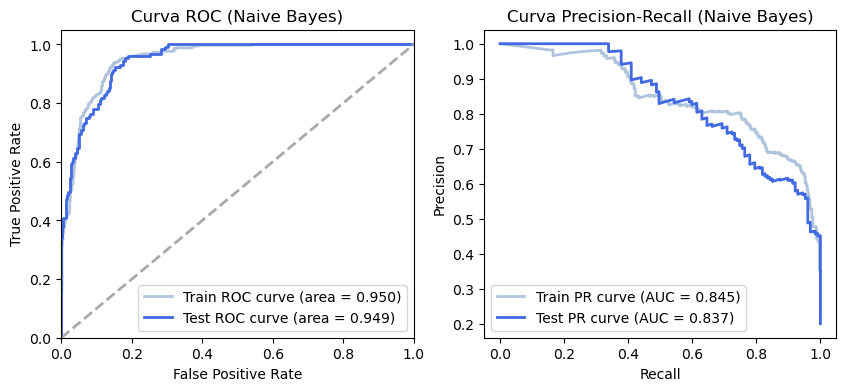

====== Métricas para Naive Bayes ======
ROC-AUC Training Set: 	0.9499444474659497
ROC-AUC Test Set: 	0.9490440913820684
PR-AUC Training Set: 	0.8454387568963513
PR-AUC Test Set: 	0.8365627565274089
F1-score Training Set: 	0.7710144927536232
F1-score Test Set: 	0.72


In [57]:
# 1. Curva ROC y ROC-AUC para Training Set (Naive Bayes)
fpr_train_nb, tpr_train_nb, _ = roc_curve(y_train, y_pred_train_nb[:, 1])
roc_auc_train_nb = auc(fpr_train_nb, tpr_train_nb)

# 2. Curva ROC y AUC para Test Set (Naive Bayes)
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test, y_pred_test_nb[:, 1])
roc_auc_test_nb = auc(fpr_test_nb, tpr_test_nb)

# 3. Curva PR y PR-AUC para Training Set (Naive Bayes)
precision_train_nb, recall_train_nb, _ = precision_recall_curve(y_train, y_pred_train_nb[:, 1])
pr_auc_train_nb = average_precision_score(y_train, y_pred_train_nb[:, 1])

# 4. Curva PR y PR-AUC para Test Set (Naive Bayes)
precision_test_nb, recall_test_nb, _ = precision_recall_curve(y_test, y_pred_test_nb[:, 1])
pr_auc_test_nb = average_precision_score(y_test, y_pred_test_nb[:, 1])

# 5. F1 Score para Training Set (Naive Bayes)
f1_train_nb = f1_score(y_train, y_pred_train_nb[:, 1] > 0.5)  # Convertimos la probabilidad a clase binaria

# 6. F1 Score para Test Set (Naive Bayes)
f1_test_nb = f1_score(y_test, y_pred_test_nb[:, 1] > 0.5)  # Convertimos la probabilidad a clase binaria


# Graficar Curvas ROC y Precision-Recall para Naive Bayes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Curva ROC para Training y Test (Naive Bayes)
axes[0].plot(fpr_train_nb, tpr_train_nb, color='lightsteelblue', lw=2, label='Train ROC curve (area = %0.3f)' % roc_auc_train_nb)
axes[0].plot(fpr_test_nb, tpr_test_nb, color='royalblue', lw=2, label='Test ROC curve (area = %0.3f)' % roc_auc_test_nb)
axes[0].plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Curva ROC (Naive Bayes)')
axes[0].legend(loc='lower right')

# Curva Precision-Recall para Training y Test (Naive Bayes)
axes[1].plot(recall_train_nb, precision_train_nb, color='lightsteelblue', lw=2, label='Train PR curve (AUC = %0.3f)' % pr_auc_train_nb)
axes[1].plot(recall_test_nb, precision_test_nb, color='royalblue', lw=2, label='Test PR curve (AUC = %0.3f)' % pr_auc_test_nb)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Curva Precision-Recall (Naive Bayes)')
axes[1].legend(loc='lower left')

#plt.savefig("Naive_Bayes.png", dpi=600)
plt.show()

# Métricas para Naive Bayes
print("====== Métricas para Naive Bayes ======")
print(f'ROC-AUC Training Set: \t{roc_auc_train_nb}')
print(f'ROC-AUC Test Set: \t{roc_auc_test_nb}')
print(f'PR-AUC Training Set: \t{pr_auc_train_nb}')
print(f'PR-AUC Test Set: \t{pr_auc_test_nb}')
print(f'F1-score Training Set: \t{f1_train_nb}')
print(f'F1-score Test Set: \t{f1_test_nb}')


1. La diferencia entre el ROC-AUC en el conjunto de entrenamiento y el de prueba es mínima. Este resultado sugiere que el modelo está funcionando muy bien tanto en el conjunto de entrenamiento como en el de test, **sin signos evidentes de sobreajuste**.
2. La diferencia en PR-AUC también es pequeña, lo cual es una buena señal de que el modelo está generalizando correctamente.
3. La F1-score muestra una mayor diferencia entre los conjuntos de entrenamiento y prueba en comparación con las otras métricas. Esta diferencia podría ser una indicación de ligero sobreajuste. El modelo tiene un desempeño algo mejor en el conjunto de entrenamiento en cuanto al equilibrio entre precisión y recuperación. 

# 6. Entrenamiento Algoritmo 2 - Support Vector Machine (SVM)


## 6.1. Búsqueda de mejores Hiperparámetros con GridSearch

Con el fin de buscar los mejores hiperparámetros del algortimo SVM, se ha utilizado la función GridSearch de sklearn para tratar de encontrar la mejor combinación posible.

- **C**: controla la regularización del modelo. Un valor alto de C da menos margen de error y fuerza al modelo a clasificar correctamente cada punto de entrenamiento, lo que puede llevar a sobreajuste. Un valor bajo de C permite un margen más amplio y una mejor generalización.  

- **Kernel**: define cómo se transforman los datos en un espacio de mayor dimensión para hacerlos separables. Las opciones más comunes son:  
   - **linear**: adecuado para datos linealmente separables.  
   - **poly**: usa un polinomio para separar los datos.  
   - **rbf**: utiliza funciones de base radial y es útil cuando la relación entre las variables no es lineal.  
   - **sigmoid**: similar a las funciones de activación de redes neuronales.  

- **Gamma**: solo aplicable a los kernels `rbf`, `poly` y `sigmoid`. Determina el impacto de un solo punto de datos en la clasificación. Un gamma alto hace que cada punto tenga más influencia, lo que puede llevar a sobreajuste. Un gamma bajo permite que los puntos tengan un efecto más amplio, lo que mejora la generalización.  

- **Degree**: solo se usa con el kernel `poly` y define el grado del polinomio utilizado para separar los datos. Un grado más alto permite modelos más complejos, pero también aumenta el riesgo de sobreajuste.


In [101]:
# Hiperparámetros para el GridSearchCV
param_grid = [
    {"kernel": ["rbf"], "gamma": [1e-2, 1e-3, 1e-4, 1e-5], "C": [0.1, 1, 5, 10]},
    {"kernel": ["linear"], "C": [0.1, 1, 5, 10]},
    {"kernel": ["poly"], "C": [0.1, 1, 10], "degree": [2, 3, 4, 5]}
]
 
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid, 
        scoring    = 'roc_auc', # roc_auc, accuracy
        n_jobs     = -1,    # -1 indica "hasta que acabes"
        cv         = 3,     # cross validation 3 fold
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
# _ = grid.fit(X = X_train, y = y_train)
grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
17,1.0,NaN,linear,NaN,0.959248,0.008384,0.967605,0.004214
18,5.0,NaN,linear,NaN,0.958192,0.006694,0.967738,0.004168
16,0.1,NaN,linear,NaN,0.957181,0.010393,0.964088,0.004563
19,10.0,NaN,linear,NaN,0.956590,0.007556,0.967485,0.004287
14,10.0,0.0001,rbf,NaN,0.952651,0.008765,0.969350,0.003179
9,5.0,0.0010,rbf,NaN,0.950993,0.007179,0.994628,0.001832
13,10.0,0.0010,rbf,NaN,0.950212,0.007407,0.996853,0.001476
10,5.0,0.0001,rbf,NaN,0.947885,0.007148,0.963799,0.003183
5,1.0,0.0010,rbf,NaN,0.946406,0.007260,0.982083,0.002859
31,10.0,NaN,poly,5.0,0.940329,0.014579,0.953199,0.005935


In [107]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


Los resultados del GridSearch permiten concluir que, para este conjunto de datos, el SVM con kernel lineal y el parámetro C = 1 arroja los mejores resultados. 

## 6.2. Entrenamiento del modelo

In [59]:
# Se crea el objeto classifier con el SVM lineal de sklearn
svm = SVC(C = 1,           # Hiperparámetro fijado a 1 (valor por defecto)
          kernel = 'linear',    # Kernel de tipo lineal
          probability = True)  # Habilita las estimaciones de probabilidad

svm

SVC(C=1, kernel='linear', probability=True)

In [61]:
# Se almacena el tiempo inicial
start_time_svm = time.time()

# Se entrena el modelo
modelo_svm = svm.fit(X_train, y_train)

# Se hacen las predicciones para el set de entrenamiento y el Test
y_pred_train_svm = modelo_svm.predict_proba(X_train) 
y_pred_test_svm = modelo_svm.predict_proba(X_test)

# Almaceno las predicciones en binario (0 o 1), que serán útiles para calcular el accuracy y la matriz de confusión
y_pred_train_svm_binario = (y_pred_train_svm[:, 1] >= 0.5).astype(int)  
y_pred_test_svm_binario = (y_pred_test_svm[:, 1] >= 0.5).astype(int) 

# Se almacena el tiempo final
end_time_svm = time.time()

# Calculo cuanto tiempo ha tardado el modelo en hacer el fit y las predicciones
total_time_svm = end_time_svm - start_time_svm
print(total_time_svm, 'segundos')

6.638946771621704 segundos


## 6.3. Validación general y de sobreajuste

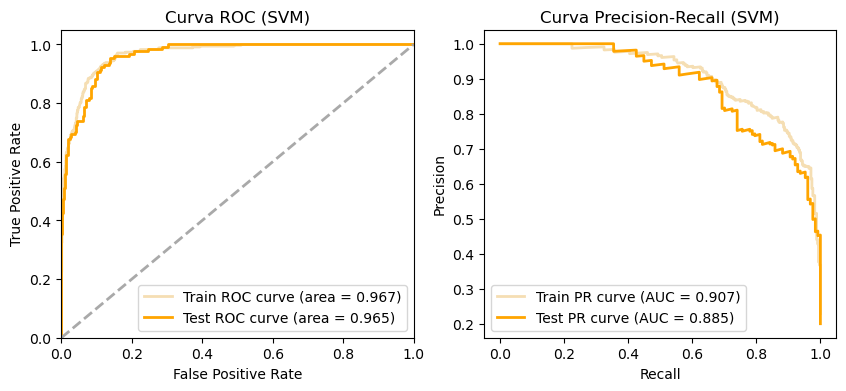

====== Métricas para SVM ======
ROC-AUC Training Set: 	0.9670763827919228
ROC-AUC Test Set: 	0.9646212862445449
PR-AUC Training Set: 	0.9066757922063952
PR-AUC Test Set: 	0.8846941501939296
F1-score Training Set: 	0.806015037593985
F1-score Test Set: 	0.7626459143968871


In [63]:
# 1. Curva ROC y ROC-AUC para Training Set (SVM)
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_pred_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# 2. Curva ROC y AUC para Test Set (SVM)
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_pred_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

# 3. Curva PR y PR-AUC para Training Set (SVM)
precision_train_svm, recall_train_svm, _ = precision_recall_curve(y_train, y_pred_train_svm[:, 1])
pr_auc_train_svm = average_precision_score(y_train, y_pred_train_svm[:, 1])

# 4. Curva PR y PR-AUC para Test Set (SVM)
precision_test_svm, recall_test_svm, _ = precision_recall_curve(y_test, y_pred_test_svm[:, 1])
pr_auc_test_svm = average_precision_score(y_test, y_pred_test_svm[:, 1])

# 5. F1 Score para Training Set (SVM)
f1_train_svm = f1_score(y_train, y_pred_train_svm[:, 1] > 0.5)  # Convertimos la probabilidad a clase binaria

# 6. F1 Score para Test Set (SVM)
f1_test_svm = f1_score(y_test, y_pred_test_svm[:, 1] > 0.5)  # Convertimos la probabilidad a clase binaria


# Graficar Curvas ROC y Precision-Recall para SVM
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Curva ROC para Training y Test (SVM)
axes[0].plot(fpr_train_svm, tpr_train_svm, color='wheat', lw=2, label='Train ROC curve (area = %0.3f)' % roc_auc_train_svm)
axes[0].plot(fpr_test_svm, tpr_test_svm, color='orange', lw=2, label='Test ROC curve (area = %0.3f)' % roc_auc_test_svm)
axes[0].plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Curva ROC (SVM)')
axes[0].legend(loc='lower right')

# Curva Precision-Recall para Training y Test (SVM)
axes[1].plot(recall_train_svm, precision_train_svm, color='wheat', lw=2, label='Train PR curve (AUC = %0.3f)' % pr_auc_train_svm)
axes[1].plot(recall_test_svm, precision_test_svm, color='orange', lw=2, label='Test PR curve (AUC = %0.3f)' % pr_auc_test_svm)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Curva Precision-Recall (SVM)')
axes[1].legend(loc='lower left')

#plt.savefig("SVM.png", dpi=600)
plt.show()

# Métricas para SVM
print("====== Métricas para SVM ======")
print(f'ROC-AUC Training Set: \t{roc_auc_train_svm}')
print(f'ROC-AUC Test Set: \t{roc_auc_test_svm}')
print(f'PR-AUC Training Set: \t{pr_auc_train_svm}')
print(f'PR-AUC Test Set: \t{pr_auc_test_svm}')
print(f'F1-score Training Set: \t{f1_train_svm}')
print(f'F1-score Test Set: \t{f1_test_svm}')


1. La diferencia entre el Training Set y el Test Set es pequeña, lo cual es una buena señal. Un valor cercano a 1 en ROC-AUC indica que el modelo es muy eficaz para discriminar entre las clases, tanto en el conjunto de entrenamiento como en el de test. **No parece haber un problema de sobreajuste** en cuanto a esta métrica.

2. Similar al caso de ROC-AUC, la diferencia en PR-AUC entre el conjunto de entrenamiento y el de prueba es relativamente pequeña. La PR-AUC también es bastante alta, lo que indica que el modelo tiene un buen rendimiento, tanto en precisión como en recuperación.

3. En este caso, la diferencia entre F1-score del conjunto de entrenamiento es algo mayor. Aunque la diferencia no es enorme, sí podría ser una señal de ligero sobreajuste, ya que el modelo tiene un rendimiento un poco mejor en el conjunto de entrenamiento en comparación con el de test. F1-score mide el balance entre la precisión y el recall, y aunque está bastante bien en general, una ligera caída en el test set es algo a tener en cuenta.

# 7. Comparación entre algoritmos

Una vez se han analizado de forma individual ambos algoritmos y se ha concluido que no presentan sobreajuste, es posible comparar el rendimiento de ambos. Para esto, es determinante haber utilizado exactamente la misma división del dataset. Además, se usarán sólo las métricas obtenidas en el set de Test, ya que son las que realmente van a permitir determinar lo buenos o malos que son los modelos prediciendo con datos que no habían visto. A continuación se han pintado en una misma gráfica el ROC y el AUC de los 2 modelos presentados previamente para tratar de establecer una comparación.

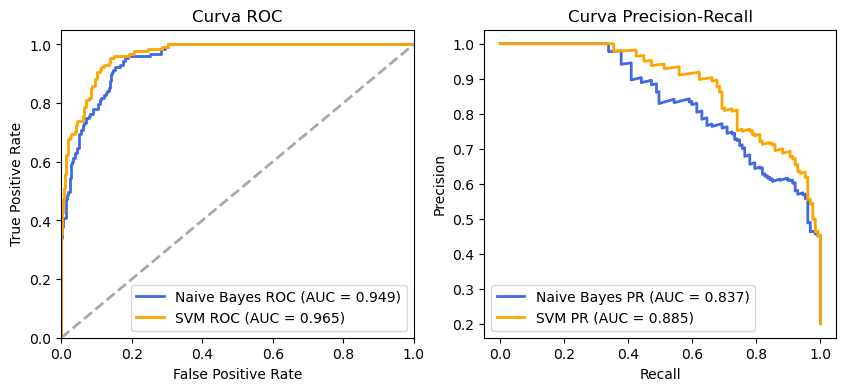

In [65]:
# Crear la figura para las gráficas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 1. Curva ROC
axes[0].plot(fpr_test_nb, tpr_test_nb, color='royalblue', lw=2, label=f'Naive Bayes ROC (AUC = {roc_auc_test_nb:.3f})')
axes[0].plot(fpr_test_svm, tpr_test_svm, color='orange', lw=2, label=f'SVM ROC (AUC = {roc_auc_test_svm:.3f})')
axes[0].plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Curva ROC')
axes[0].legend(loc='lower right')

# 2. Curva Precision-Recall
axes[1].plot(recall_test_nb, precision_test_nb, color='royalblue', lw=2, label=f'Naive Bayes PR (AUC = {pr_auc_test_nb:.3f})')
axes[1].plot(recall_test_svm, precision_test_svm, color='orange', lw=2, label=f'SVM PR (AUC = {pr_auc_test_svm:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Curva Precision-Recall')
axes[1].legend(loc='lower left')

# Mostrar las gráficas
#plt.savefig("NB_vs_SVM.png", dpi=600)
plt.show()

La anterior comparación gráfica permite concluir que, en este caso, para el mismo conjunto de datos y la misma división entre entrenamiento y set, el algoritmo de SVM consigue unos mejores resultados que Naive Bayes, ya que el área bajo la curva (AUC) de la curva ROC y de la curva PR ha sido mayor al utilizar el modelo de SVM que cuando se usó Naive Bayes. 

Además de esta comparación, se han calculado otras métricas para el conjunto de test que van a permitir una comparación más detallada:

- **Accuracy**: mide la proporción de predicciones correctas sobre el total de muestras.  
  (TP + TN) / TOTAL  

- **Precisión**: indica cuántas de las instancias clasificadas como positivas son realmente positivas.  
  TP / (TP + FP)  

- **Especificidad** (Tasa de Verdaderos Negativos): mide la proporción de negativos correctamente identificados.  
  TN / (TN + FP)  

- **Sensibilidad** (Recall o Tasa de Verdaderos Positivos): representa la proporción de positivos correctamente identificados.  
  TP / (TP + FN)  

Siendo:  
TP = *True Positives* (Verdaderos Positivos)  
TN = *True Negatives* (Verdaderos Negativos)  
FP = *False Positives* (Falsos Positivos)  
FN = *False Negatives* (Falsos Negativos)  

También se ha añadido la **matriz de confusión**:

====== Métricas para Naive Bayes ======
Accuracy: 	0.879
Precision: 	0.669
Recall: 	0.780
Especificidad: 	0.903

====== Métricas para SVM ======
Accuracy: 	0.905
Precision: 	0.756
Recall: 	0.780
Especificidad: 	0.937


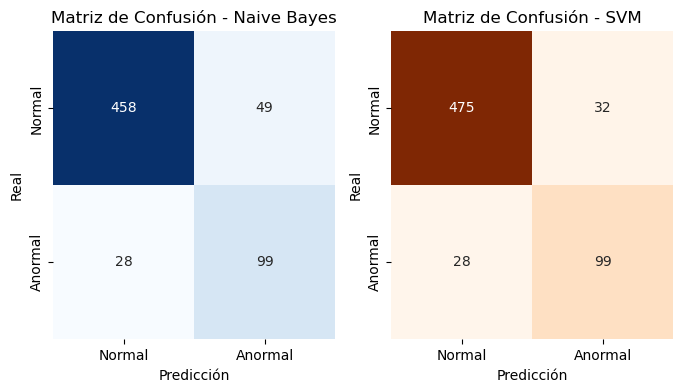

In [71]:
# Cálculo de las métricas para Naive Bayes
accuracy_nb = accuracy_score(y_true = y_test, y_pred = y_pred_test_nb_binario)
precision_nb = precision_score(y_true = y_test, y_pred = y_pred_test_nb_binario)
recall_nb = recall_score(y_true = y_test, y_pred = y_pred_test_nb_binario)

# Matriz de Confusión y Especificidad para Naive Bayes
conf_matrix_nb = confusion_matrix(y_true = y_test, y_pred = y_pred_test_nb_binario)
TN_nb, FP_nb, FN_nb, TP_nb = conf_matrix_nb.ravel()
specificity_nb = TN_nb / (TN_nb + FP_nb)  # Especificidad

# Cálculo de las métricas para SVM
accuracy_svm = accuracy_score(y_true = y_test, y_pred = y_pred_test_svm_binario)
precision_svm = precision_score(y_true = y_test, y_pred = y_pred_test_svm_binario)
recall_svm = recall_score(y_true = y_test, y_pred = y_pred_test_svm_binario)

# Matriz de Confusión y Especificidad para SVM
conf_matrix_svm = confusion_matrix(y_true = y_test, y_pred = y_pred_test_svm_binario)
TN_svm, FP_svm, FN_svm, TP_svm = conf_matrix_svm.ravel()
specificity_svm = TN_svm / (TN_svm + FP_svm)  # Especificidad


# Se imprimen los rseultados
print("====== Métricas para Naive Bayes ======")
print(f"Accuracy: \t{accuracy_nb:.3f}")
print(f"Precision: \t{precision_nb:.3f}")
print(f"Recall: \t{recall_nb:.3f}")
print(f"Especificidad: \t{specificity_nb:.3f}")

print("\n====== Métricas para SVM ======")
print(f"Accuracy: \t{accuracy_svm:.3f}")
print(f"Precision: \t{precision_svm:.3f}")
print(f"Recall: \t{recall_svm:.3f}")
print(f"Especificidad: \t{specificity_svm:.3f}")



# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 fila, 2 columnas

# Heatmap de la matriz de confusión para Naive Bayes 
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Normal", "Anormal"], yticklabels=["Normal", "Anormal"], cbar=False, ax=axes[0])
axes[0].set_title('Matriz de Confusión - Naive Bayes')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Heatmap de la matriz de confusión para SVM 
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Oranges", 
            xticklabels=["Normal", "Anormal"], yticklabels=["Normal", "Anormal"], cbar=False, ax=axes[1])
axes[1].set_title('Matriz de Confusión - SVM')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

#plt.savefig("conf_matrices.png", dpi=600)
plt.show()

A continuación se han agrupado todas las métricas en una misma tabla. Además, **es posible medir el tiempo que tardan ambos algoritmos** tanto en hacer el ajuste (fit) como en predecir los valores para el set de entrenamiento y el test; por lo que este valor también se ha añadido:


| Métrica          | Naive Bayes  | SVM   |
|------------------|-------------|-----------------|
| **ROC-AUC**      | 0.949       | **0.965**       |
| **PR-AUC**       | 0.837       | **0.885**       |
| **F1-score**     | 0.720       | **0.763**       |
| **Accuracy**     | 0.879      | **0.904**      |
| **Precisión**    | 0.669      | **0.754**      |
| **Sensibilidad** | **0.780**  | 0.772         |
| **Especificidad** | 0.903      | **0.937**      |
| **Tiempo (seg)** | **0.009444** | 6.638947      |

A partir de estos resultados se concluye que, en este caso, para el mismo conjunto de datos y la misma división entre entrenamiento y set, el algoritmo de SVM consigue unos mejores resultados que Naive Bayes. Una posible explicación para estos resultados sería la siguiente:

- Por un lado, el modelo SVM lineal utilizado tratará de buscar un hiperplano que permita una separación lineal entre las categorías de la variable 'Fetal_state'. La búsqueda de este hiperplano puede verse favorecida por la presencia de muchas variables explicativas que aumenten el espacio de búsqueda y mejoren el ajuste.

- Por otro lado, el algortimo de Naive Bayes asume que las variables explicativas son independientes entre sí, mientras que el SVM no se basa en esta asunción. Ya vimos en el Sprint 2 que existían correlaciones fuertes entre variables explicativas, lo que ha podido restar al desempeño del modelo de Naive Bayes y no al SVM.


Respecto al tiempo de computación, aunque se ha medido una única vez y el tiempo de computación variará en función de muchos parámetros, salta a la vista que **el modelo de Naive Bayes ha sido varios órdenes de magnitud más rápdio, lo que puede ser una ventaja determinante** en según qué aplicaciones.

En cualquier caso, cabe destacar que un algoritmo no es siempre mejor opción que el otro. En función del problema que se busque resolver, el tipo de datos, la cantidad de variables, el ajuste de los hiperparámetros, el tiempo y capacidad de cómputo del que dispongamos van a jugar un papel determinante en elegir un método u otro.
